# Building A classification with Python and the scikit learn 
#### Author : Frederic TWAHIRWA
# CUSTORMER CHURN 

In this project, we will be working with the custumer churn data set.Customer prediction using UCI data set to predict churn probability and help find patterns in existing data associated with the pridict churn rate.

In this notebook we are going to use different ML models for classification in order to find the one with the best score.
Models will be tested are 
- Decision Tree
- LogisticRegression
- Naive Bayes
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Random Forest

In addition 
- cross validation and 
- hyperparameters 

will be performed to optimize performances

## 1st step :
## DATA EXPLORATION
### Load the data set and summarize them 

In [1]:
import pandas as pd
churn_df = pd.read_csv('./Documents/MachineLearning/CustomerChurn/churn.csv')
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


There is 3333 samples and 21 observations , no missing data 

In [3]:
churn_columns = churn_df.columns
print (churn_columns)

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')


## Data Exploration
### Visualisation the colleration between independent variables

In [4]:
# import the necessary modules, numpy, matplotlib.pyplot and seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# keep numerical columns
columns_numeric = ['Account Length', 'VMail Message','Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls']
churn_df_numeric = churn_df[columns_numeric]

In [5]:
churn_df_numeric.head(2)

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1


In [6]:
churn_df_numeric.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


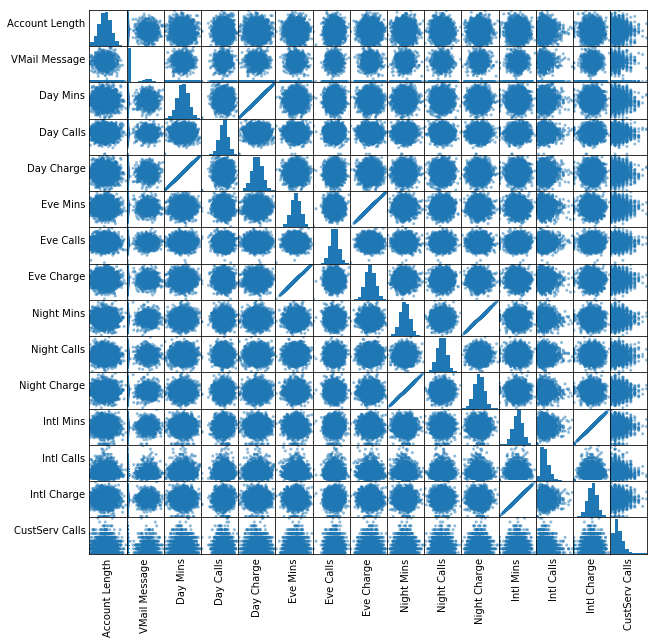

In [7]:
axs = pd.plotting.scatter_matrix(churn_df_numeric, figsize=(10, 10))
n = len(churn_df_numeric.columns) 
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
plt.show()

It is abvious that there are several highly correlated fields. Those collerted data are not very benefical for the traing model , one columns of each pair of correlated data will be removed.

In [8]:
import numpy as np
churn_df.drop(churn_df.columns[[0,2,3,9,12, 15,18]], axis=1, inplace=True)
churn_df.head(2)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.


### Data preparation for modelisation
- y : dependent variable
- df_X : independent variables

In [9]:
y = churn_df.iloc[:,-1].values
df_X =churn_df.iloc[:, :13]
df_X=pd.get_dummies(df_X)
X = df_X.values
print(df_X.head(2))
print(X)
print(y)


   Account Length  VMail Message  Day Mins  Day Calls  Eve Mins  Eve Calls  \
0             128             25     265.1        110     197.4         99   
1             107             26     161.6        123     195.5        103   

   Night Mins  Night Calls  Intl Mins  Intl Calls  CustServ Calls  \
0       244.7           91       10.0           3               1   
1       254.4          103       13.7           3               1   

   Int'l Plan_no  Int'l Plan_yes  VMail Plan_no  VMail Plan_yes  
0              1               0              0               1  
1              1               0              0               1  
[[128.   25.  265.1 ...   0.    0.    1. ]
 [107.   26.  161.6 ...   0.    0.    1. ]
 [137.    0.  243.4 ...   0.    1.    0. ]
 ...
 [ 28.    0.  180.8 ...   0.    1.    0. ]
 [184.    0.  213.8 ...   1.    1.    0. ]
 [ 74.   25.  234.4 ...   0.    0.    1. ]]
['False.' 'False.' 'False.' ... 'False.' 'False.' 'False.']


### Transform the the prediction target 
we are going to use the LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Encoding CLass Label
y = le.fit_transform(y)
list(le.classes_)
class_names = ['Churn : No', 'Churn :Yes']

### split data set into training and test data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

The above snippet will split data into training and test set. X_train, y_train are training data &  X_test, y_test belongs to the test dataset.

The parameter test_size is given value 0.3; it means test sets will be 30% of whole dataset  & training dataset’s size will be 70% of the entire dataset. random_state variable is a pseudo-random number generator state used for random sampling. If you want to replicate our results, then use the same value of random_state

## 2nd Step
## Building Decision Tree Algorithm

Decision trees are the building blocks of some of the most powerful supervised learning methods that are used today. A decision tree is basically a binary tree flowchart where each node splits a group of observations according to some feature variable

#### Decision Tree Classifier with criterion information gain

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=0)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Prediction

Now, we have modeled 1 classifier with information gain as the criterion. We are ready to predict classes for our test set. We can use predict() method.

In [13]:
y_pred=clf_dt.predict(X_test)
print ("Training score :", clf_dt.score(X_train, y_train))
print ("Test score :", clf_dt.score(X_test, y_test))
# Compute metrics
print(classification_report(y_test, y_pred))

Training score : 0.9554222031718816
Test score : 0.935
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       855
          1       0.81      0.72      0.76       145

avg / total       0.93      0.94      0.93      1000



### Visualizing Decision Trees with Python

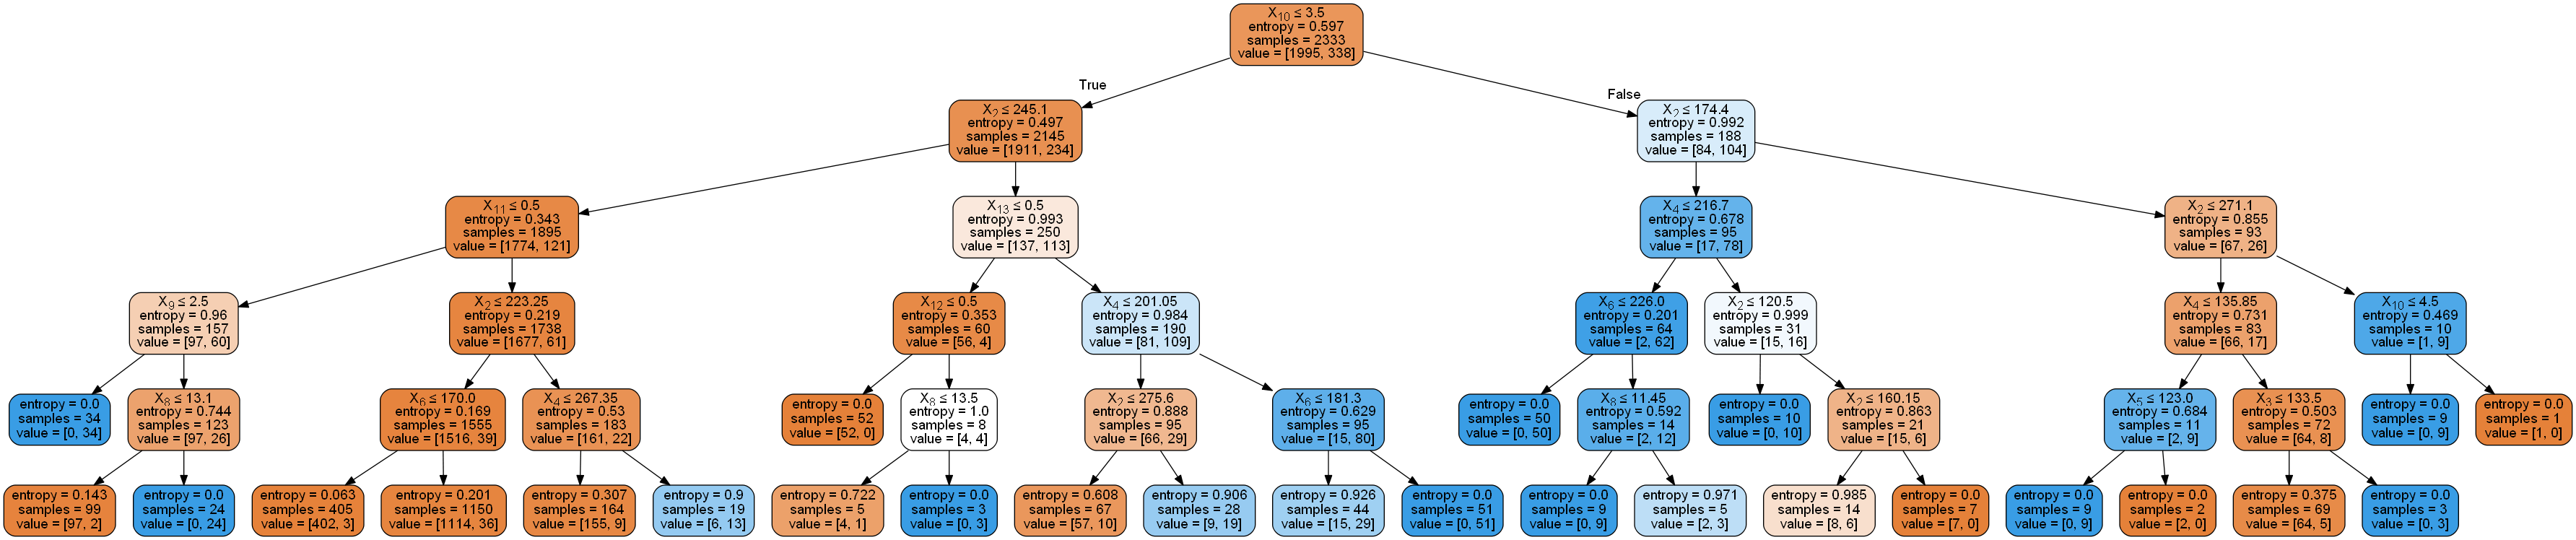

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# install pydotplus : conda install -c conda-forge pydotplus
#conda install graphviz"
#add to the PATH (environement variable) D:\ProgramData\Anaconda3\Library\bin\graphviz

import pydotplus
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluation of the model

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

y_pred=clf_dt.predict(X_test)
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print (confmat)
#print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
#print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
#print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

[[831  24]
 [ 41 104]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       855
          1       0.81      0.72      0.76       145

avg / total       0.93      0.94      0.93      1000



### Helper function to visualize confusion matrix 
A confusion matrix, also known as an error matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
- more info : https://en.wikipedia.org/wiki/Confusion_matrix

### Plotting the confusion matrix

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[831  24]
 [ 41 104]]
Normalized confusion matrix
[[0.97192982 0.02807018]
 [0.28275862 0.71724138]]


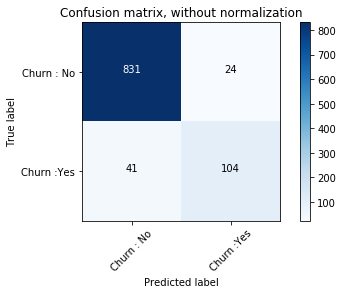

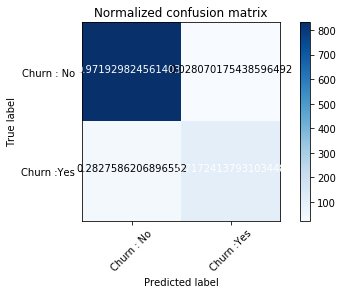

In [17]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Visualize ROC curve

a ROC curve can be used to select a threshold for a classifier which maximises the true positives, while minimising the false positives

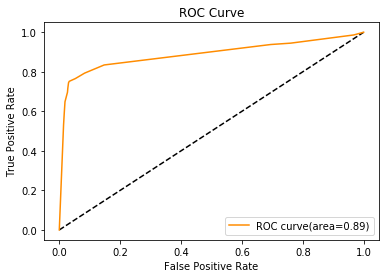

In [18]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_dt.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc=auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label=('ROC curve(area=%.2f)' % roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Cross validation 

In [19]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_dt.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf_dt, X, y, scoring='roc_auc', cv=10)

# Print list of AUC scores
print("AUC scores computed using 10-fold cross-validation: {}".format(cv_auc))

AUC: 0.8865577737447066
AUC scores computed using 10-fold cross-validation: [0.84747583 0.93054064 0.82810598 0.8306652  0.89122807 0.90233918
 0.92346491 0.86388889 0.87481725 0.95785819]


### Features importances

In [20]:
### features importances 

feat_labels= df_X.columns
print(feat_labels)
importances = clf_dt.feature_importances_
indices =np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range (X_train.shape[1]):
    print ("feature n°%d :  %s : (%f)" % (f + 1, feat_labels[indices[f]], importances[indices[f]]))

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Int'l Plan_no', 'Int'l Plan_yes', 'VMail Plan_no',
       'VMail Plan_yes'],
      dtype='object')
Feature ranking:
feature n°1 :  Day Mins : (0.313907)
feature n°2 :  CustServ Calls : (0.160438)
feature n°3 :  Int'l Plan_no : (0.130369)
feature n°4 :  Eve Mins : (0.122315)
feature n°5 :  Intl Mins : (0.094759)
feature n°6 :  Intl Calls : (0.065734)
feature n°7 :  VMail Plan_no : (0.044606)
feature n°8 :  Night Mins : (0.033315)
feature n°9 :  Int'l Plan_yes : (0.014677)
feature n°10 :  Day Calls : (0.011514)
feature n°11 :  Eve Calls : (0.008366)
feature n°12 :  VMail Plan_yes : (0.000000)
feature n°13 :  Night Calls : (0.000000)
feature n°14 :  VMail Message : (0.000000)
feature n°15 :  Account Length : (0.000000)


#### here DayMins, CustServ calls are the important features...

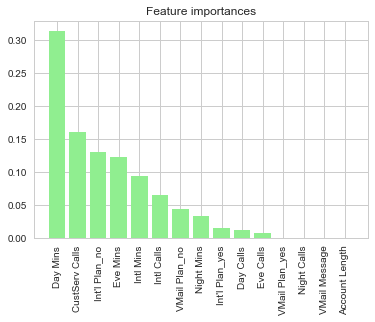

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (style='whitegrid', context='notebook')

plt.title('Feature importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightgreen', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim= ([-1, X_train.shape[1]])

plt.show()

## Hyperparameter tuning with RandomizedSearchCV

In [22]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.9177917791779178


### Get the best estimator

In [23]:
clf = tree_cv.best_estimator_
clf.fit (X_train, y_train)
y_pred=clf.predict(X_test)
print('Test accuracy : %.3f' % clf.score(X_test, y_test))
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print (confmat)
print(classification_report(y_test, y_pred))

Test accuracy : 0.928
[[835  20]
 [ 52  93]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       855
          1       0.82      0.64      0.72       145

avg / total       0.92      0.93      0.92      1000



## Hyperparameter tuning with GridSearchCV

#### GridSearch with precision as a scoring parameter 

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gs_precision = GridSearchCV(
        estimator = DecisionTreeClassifier(criterion='entropy',random_state=0),
        param_grid=[{'max_depth': [6,7,8,9,10,11,12,13,14,15,16,18, None]}],
        scoring = 'precision',
        cv = 10,
        n_jobs= -1)

gs_precision = gs_precision.fit(X_train, y_train)
print(gs_precision.best_score_)
print(gs_precision.best_params_)

0.8668761572111651
{'max_depth': 6}


In [25]:
clf_precision = gs_precision.best_estimator_
clf_precision.fit (X_train, y_train)
y_pred_precision =clf_precision.predict(X_test)
print('Test accuracy : %.3f' % clf_precision.score(X_test, y_test))
confmat_precision= confusion_matrix(y_true=y_test, y_pred=y_pred_precision)
print (confmat_precision)
print(classification_report(y_test, y_pred_precision))

Test accuracy : 0.936
[[836  19]
 [ 45 100]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       855
          1       0.84      0.69      0.76       145

avg / total       0.93      0.94      0.93      1000



#### GridSearch with accuracy as a scoring parameter 

In [26]:
gs_accuracy = GridSearchCV(
        estimator = DecisionTreeClassifier(criterion='entropy',random_state=0),
        param_grid=[{'max_depth': [6,7,8,9,10,11,12,13,14,15,16,18, None]}],
        scoring = 'accuracy',
        cv = 10,
        n_jobs= -1)

gs_accuracy = gs_accuracy.fit(X_train, y_train)
print(gs_accuracy.best_score_)
print(gs_accuracy.best_params_)

0.9442777539648521
{'max_depth': 8}


In [27]:
clf_accuracy = gs_accuracy.best_estimator_
clf_accuracy.fit (X_train, y_train)
y_pred_accuracy=clf_accuracy.predict(X_test)
print('Test accuracy : %.3f' % clf.score(X_test, y_test))
confmat_accuracy = confusion_matrix(y_true=y_test, y_pred=y_pred_accuracy)
print (confmat_accuracy)
print(classification_report(y_test, y_pred_accuracy))

Test accuracy : 0.928
[[820  35]
 [ 40 105]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       855
          1       0.75      0.72      0.74       145

avg / total       0.92      0.93      0.92      1000



### performences between accuracy and precision as a criterion of optimization are slight different. To choose between those two criterions it is depend on the cost function.

# 3rd step :  Models competions

##### Here we are going to test several models in order to choose the best one
- LogisticRegression
- Naive Bayes
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Random Forest

## Logistic regression 

In [28]:
from sklearn.linear_model import LogisticRegression

lg= LogisticRegression(C=100)
lg.fit(X_train, y_train)
y_pred_lg =lg.predict(X_test)
confmat_lg = confusion_matrix(y_true=y_test, y_pred=y_pred)
print (confmat_lg)
print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred_lg))
print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred_lg))
print ("Training score :", lg.score(X_train, y_train))
print ("Test score :", lg.score(X_test, y_test))
print(classification_report(y_test, y_pred_lg))

[[835  20]
 [ 52  93]]
Precision : 0.823
Recall : 0.152
F1_score : 0.223
Training score : 0.866695242177454
Test score : 0.847
             precision    recall  f1-score   support

          0       0.87      0.96      0.92       855
          1       0.42      0.15      0.22       145

avg / total       0.81      0.85      0.81      1000



## Classification using Naive Bayes

In [29]:
##from sklearn.metrics import precision_score
##from sklearn.metrics import recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

gb= GaussianNB()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
confmat_gb= confusion_matrix(y_true=y_test, y_pred=y_pred)
print (confmat_gb)
print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred_gb))
print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred_gb))
print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred_gb))
print ("Training score :", gb.score(X_train, y_train))
print ("Test score :", gb.score(X_test, y_test))
print(classification_report(y_test, y_pred_gb))

[[835  20]
 [ 52  93]]
Precision : 0.431
Recall : 0.386
F1_score : 0.407
Training score : 0.8551221603086155
Test score : 0.837
             precision    recall  f1-score   support

          0       0.90      0.91      0.91       855
          1       0.43      0.39      0.41       145

avg / total       0.83      0.84      0.83      1000



## Classification using K-Nearest Neighbors (KNN)

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred_knn=knn.predict(X_test_std)
confmat_knn= confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
print (confmat)
print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred_knn))
print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred_knn))
print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred_knn))
print ("Training score :", knn.score(X_train_std, y_train))
print ("Test score :", knn.score(X_test_std, y_test))
print(classification_report(y_test, y_pred_knn))

[[835  20]
 [ 52  93]]
Precision : 0.781
Recall : 0.172
F1_score : 0.282
Training score : 0.8911273039005573
Test score : 0.873
             precision    recall  f1-score   support

          0       0.88      0.99      0.93       855
          1       0.78      0.17      0.28       145

avg / total       0.86      0.87      0.84      1000



## classification using Support Vector Machines (SVM)

In [31]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf', gamma=0.1, random_state=0, C=10)

svc.fit(X_train_std, y_train)

y_pred_svm=svc.predict(X_test_std)
confmat_svm = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
print (confmat)
print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred_svm))
print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred_svm))
print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred_svm))
print ("Training score :", svc.score(X_train, y_train))
print ("Test score :", svc.score(X_test, y_test))
print(classification_report(y_test, y_pred_svm))

[[835  20]
 [ 52  93]]
Precision : 0.771
Recall : 0.559
F1_score : 0.648
Training score : 0.8551221603086155
Test score : 0.855
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       855
          1       0.77      0.56      0.65       145

avg / total       0.91      0.91      0.91      1000



## Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion= 'entropy',
                               n_estimators=100,
                               random_state=0,
                               n_jobs=-1)

forest.fit(X_train, y_train)
y_pred_rf=forest.predict(X_test)
confmat_rf= confusion_matrix(y_true=y_test, y_pred=y_pred)
print (confmat)
print('Precision : %.3f' % precision_score(y_true=y_test, y_pred=y_pred_rf))
print('Recall : %.3f' % recall_score(y_true=y_test, y_pred=y_pred_rf))
print('F1_score : %.3f' % f1_score(y_true=y_test, y_pred=y_pred_rf))
print ("Training score :", lg.score(X_train, y_train))
print ("Test score :", lg.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))

[[835  20]
 [ 52  93]]
Precision : 0.903
Recall : 0.641
F1_score : 0.750
Training score : 0.866695242177454
Test score : 0.847
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       855
          1       0.90      0.64      0.75       145

avg / total       0.94      0.94      0.93      1000



### As it's can be expected Random Forest has the best score 

## 4th Step :  Hyperparameters with the best model => Random Forest

In [33]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

param_grid = {"max_depth": [3, None],
             "min_samples_leaf": [1, 3, 10],
             "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

gs_forest = GridSearchCV(forest,
                         param_grid=param_grid,
                        scoring = 'accuracy',
                         cv = 10,
                         n_jobs= -1)

#Fit the classifier to the data

gs_forest = gs_forest.fit(X_train, y_train)
print(gs_forest.best_score_)
print(gs_forest.best_params_)
clf_gs_rf = gs_forest.best_estimator_
clf_gs_rf.fit (X_train, y_train)
y_pred_gs_rf=clf.predict(X_test)
print('Test accuracy : %.3f' % clf_gs_rf.score(X_test, y_test))
confmat_gs_rf= confusion_matrix(y_true=y_test, y_pred=y_pred_gs_rf)
print (confmat_gs_rf)
print(classification_report(y_test, y_pred_gs_rf))

0.9554222031718816
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3}
Test accuracy : 0.954
[[835  20]
 [ 52  93]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       855
          1       0.82      0.64      0.72       145

avg / total       0.92      0.93      0.92      1000



### Visualisation Confusion Matrix (Random Forest)

Confusion matrix, without normalization
[[835  20]
 [ 52  93]]
Normalized confusion matrix
[[0.97660819 0.02339181]
 [0.35862069 0.64137931]]


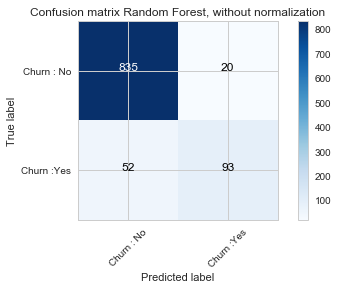

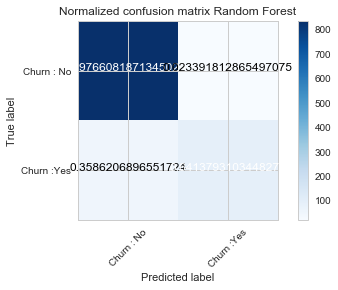

In [34]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat_gs_rf, classes=class_names,
                      title='Confusion matrix Random Forest, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmat_gs_rf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix Random Forest')
plt.show()

### Visualisation ROC curve (Random Forest)

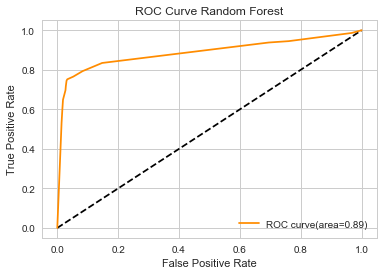

In [35]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities: y_pred_prob
y_pred_prob_gs_rf = clf_gs_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_gs_rf, tpr_gs_rf, thresholds = roc_curve(y_test, y_pred_prob_gs_rf)
roc_auc_gs_rf=auc(fpr_gs_rf, tpr_gs_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='darkorange', label=('ROC curve(area=%.2f)' % roc_auc_gs_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc='lower right')
plt.show()

In [36]:
### features importances 

feat_labels= df_X.columns
print(feat_labels)
importances_gs_rf = clf_gs_rf.feature_importances_
indices =np.argsort(importances_gs_rf)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range (X_train.shape[1]):
    print ("feature n°%d :  %s : (%f)" % (f + 1, feat_labels[indices[f]], importances_gs_rf[indices[f]]))

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Int'l Plan_no', 'Int'l Plan_yes', 'VMail Plan_no',
       'VMail Plan_yes'],
      dtype='object')
Feature ranking:
feature n°1 :  Day Mins : (0.266813)
feature n°2 :  CustServ Calls : (0.135885)
feature n°3 :  Eve Mins : (0.130302)
feature n°4 :  Intl Mins : (0.080408)
feature n°5 :  Intl Calls : (0.067467)
feature n°6 :  Night Mins : (0.062062)
feature n°7 :  Int'l Plan_yes : (0.049645)
feature n°8 :  Int'l Plan_no : (0.047137)
feature n°9 :  Night Calls : (0.028906)
feature n°10 :  Day Calls : (0.026678)
feature n°11 :  Eve Calls : (0.026669)
feature n°12 :  VMail Message : (0.023486)
feature n°13 :  Account Length : (0.022533)
feature n°14 :  VMail Plan_no : (0.016770)
feature n°15 :  VMail Plan_yes : (0.015239)


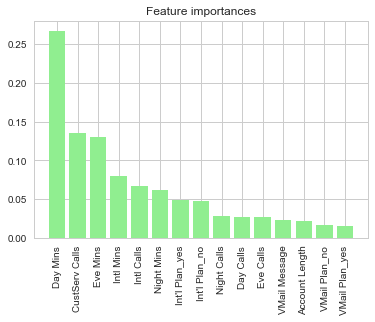

In [37]:
#import matplotlib.pyplot as plt
#import seaborn as sns
sns.set (style='whitegrid', context='notebook')

plt.title('Feature importances')
plt.bar(range(X_train.shape[1]), importances_gs_rf[indices], color='lightgreen', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim= ([-1, X_train.shape[1]])

plt.show()


###### In this poject we have performed classification ( supervised Machine learning ) with several ML models. The Random Forest is the one with the best score.